# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Rizki Ilhamnuddin Muria
- **Email:** rizkiilhammuria@gmail.com / mc009d5y1602@student.devacademy.id
- **ID Dicoding:**MC009D5Y1602

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 = Hari apa saja dengan cuaca seperti apa yang memiliki jumlah Penyewa terbanyak?
*   Pertanyaan 2 =  Bagaimana perbandingan antara jumlah penyewaan sepeda pada musim semi, musim panas, musim gugur, dan musim dingin?
- Pertanyaan 3 = Pada jam berapa penyewaan sepeda mencapai jumlah tertinggi dalam peminjamannya?


## Import Semua Packages/Library yang Digunakan

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [2]:
df_day = pd.read_csv("day.csv")
df_hour = pd.read_csv("hour.csv")


In [3]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Disini kita bisa melihat isi dari dua dataset yaitu dataset hour.csv yang kita definisikan menjadi df_hour, lalu juga dataset day.csv menjadi df_day
- Kita bisa lihat terdapat beberapa column di setiap datasetnya yaitu sepert instant, dteday, season, yr, month, holiday, weekday, workigday, wathersit, temp, atemp, hum, wiondspeed, casual, registered, dan cnt untuk dibagian dataset day.csv. sedangkan didataset hour.csv sama seperti day.csv namun terdapat tambahan 1 column yaitu hr.

### Assessing Data

In [5]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


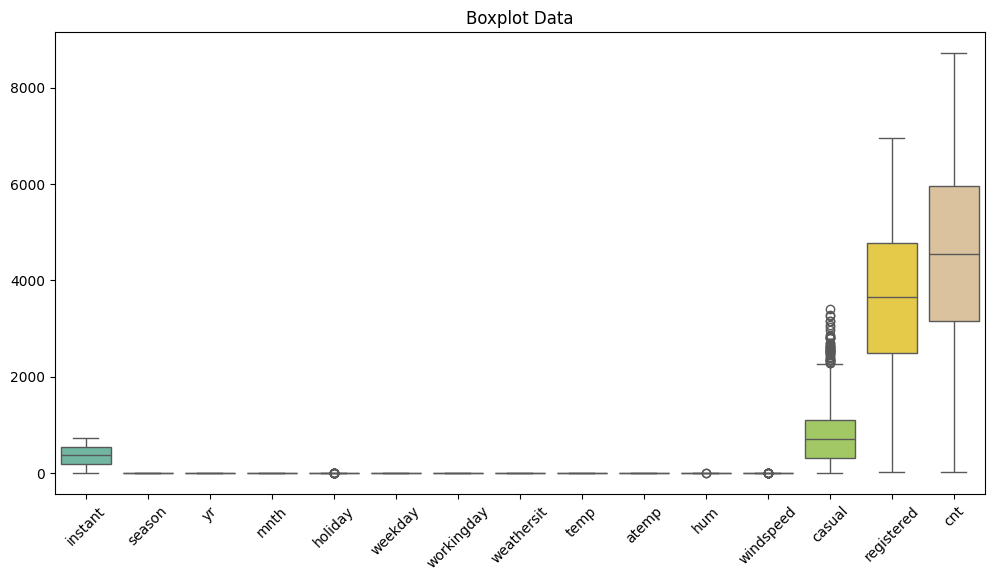

In [7]:
plt.figure(figsize=(12, 6))  # Atur ukuran lebih besar
sns.boxplot(data=df_day, palette="Set2")  # Warna lebih menarik
plt.xticks(rotation=45)  # Memiringkan label jika terlalu panjang
plt.title("Boxplot Data")  # Judul plot
plt.show()

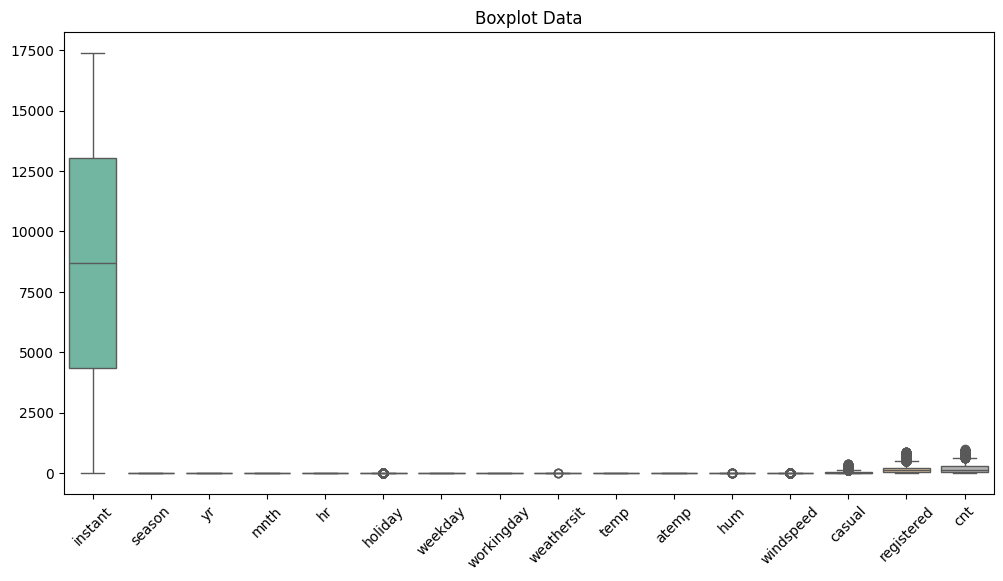

In [8]:
plt.figure(figsize=(12, 6))  # Atur ukuran lebih besar
sns.boxplot(data=df_hour, palette="Set2")  # Warna lebih menarik
plt.xticks(rotation=45)  # Memiringkan label jika terlalu panjang
plt.title("Boxplot Data")  # Judul plot
plt.show()

In [9]:
df_day.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [10]:
df_hour.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [11]:
df_day.duplicated().sum()

0

In [12]:
df_hour.duplicated().sum()

0

In [13]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [14]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Dari kedua dataset diatas bisa dilihat bahwa memiliki 3 tipe data yaitu float64(4), int64(11), object(1) untuk dibagian day.csv dan float64(4), int64(12), object(1) untuk didataset hour.csv. Namun terdapat kesalahan tipe data pafa bagian dteday yaitu tipenya object yang seharusnya memiliki tepe data datetime.
- Dikedua dataset tersebut tidak terdapat missing value dan juga duplicate data.
- Dan juga tidak terdapat outlier pada kedua dataset tersebut karena memiliki nilai yang sudah sesuai tanpa adanya nilai yang tidak masuk akal.

### Cleaning Data

In [15]:
df_day.drop(columns=['instant'], inplace=True)


In [16]:
df_hour.drop(columns=['instant'], inplace=True)


In [17]:
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
print(df_day.dtypes)

dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


In [18]:
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])
print(df_day.dtypes)

dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


**Insight:**
- Dibagian cleaning melakukan penghapusan pada column instant karena hanya berisi nilai indexing saja dan tidak mempengaruhi data tersebut.
- Melakukan perubahan tipe data pada bagian dteday yang awalnya object menjadi tipe data datetime.

## Exploratory Data Analysis (EDA)

### Explore ...

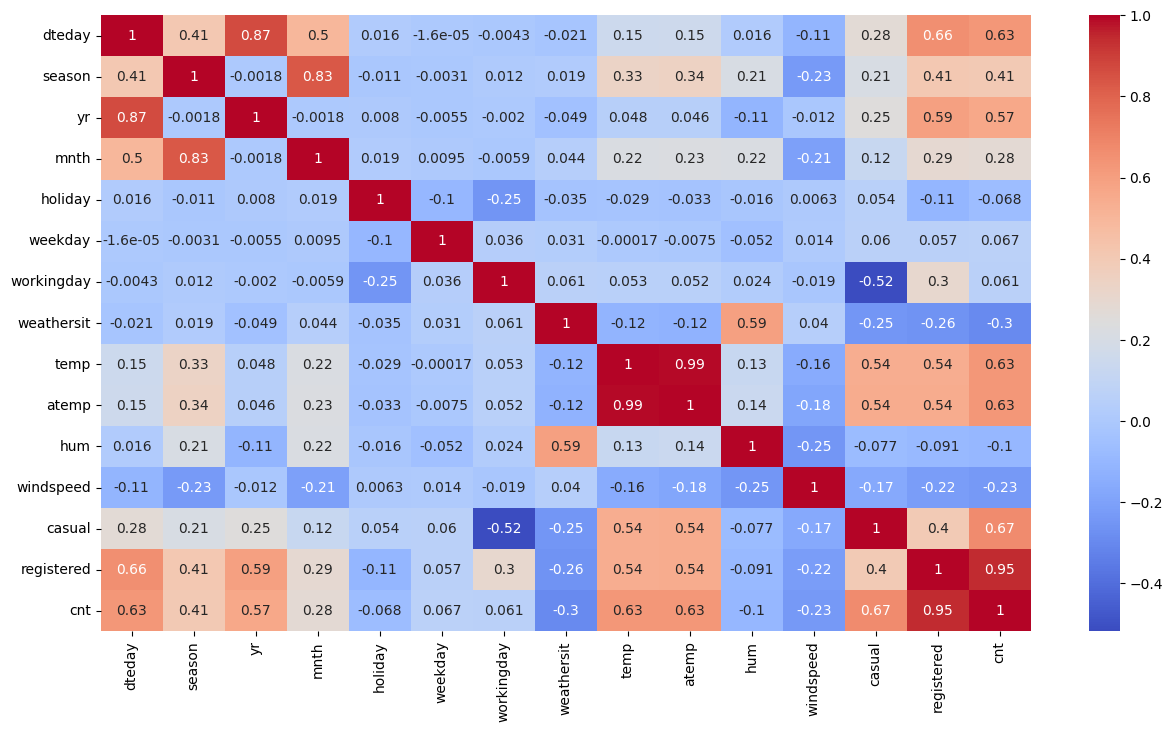

In [19]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_day.corr(), annot=True, cmap="coolwarm")
plt.show()

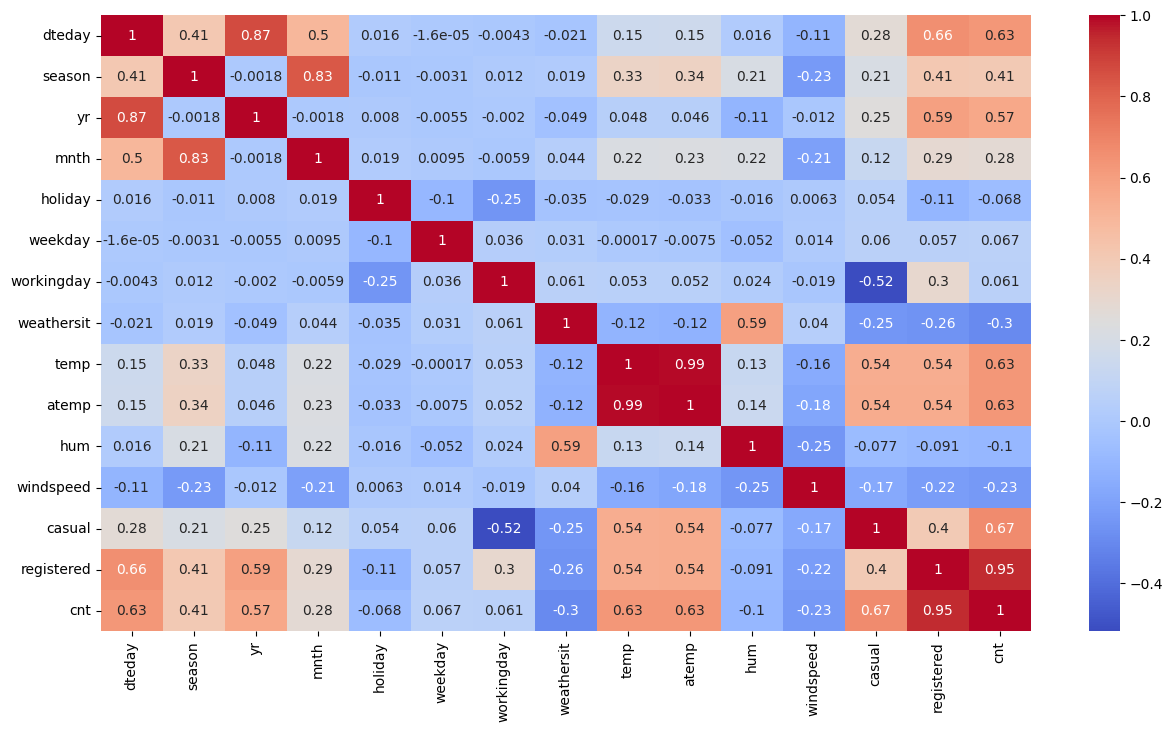

In [20]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_day.corr(), annot=True, cmap="coolwarm")
plt.show()


In [21]:
top_hour = df_hour.groupby("hr")["cnt"].sum().idxmax()
max_rent = df_hour.groupby("hr")["cnt"].sum().max()

print(f"Jumlah penyewa terbanyak terjadi pada pukul {top_hour}:00 dengan total {max_rent} penyewa.")


Jumlah penyewa terbanyak terjadi pada pukul 17:00 dengan total 336860 penyewa.


In [22]:
top_hour_weather = df_hour.groupby(["weathersit", "hr"])["cnt"].sum().reset_index()
top_hour_weather = top_hour_weather.loc[top_hour_weather.groupby("weathersit")["cnt"].idxmax()]

top_hour_weather["Kondisi Cuaca"] = top_hour_weather["weathersit"].replace({
    1: "clear",
    2: "mist",
    3: "light snow, light rain",
    4: "heavy rain"
})

top_hour_weather = top_hour_weather[["Kondisi Cuaca", "hr", "cnt"]]
top_hour_weather.columns = ["Kondisi Cuaca", "Jam Tersibuk", "Total Penyewa"]
print(top_hour_weather)


             Kondisi Cuaca  Jam Tersibuk  Total Penyewa
17                   clear            17         253718
32                    mist             8          89604
65  light snow, light rain            17          20975
74              heavy rain            18            164


In [23]:
day_names = ["Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu", "Minggu"]

daily_rentals = df_day.groupby("weekday")["cnt"].sum().reset_index()

daily_rentals["Hari"] = daily_rentals["weekday"].apply(lambda x: day_names[x])
daily_rentals.drop(columns=["weekday"], inplace=True)

daily_rentals.columns = ["Total penyewa", "Hari"]
print(daily_rentals)


   Total penyewa    Hari
0         444027   Senin
1         455503  Selasa
2         469109    Rabu
3         473048   Kamis
4         485395   Jumat
5         487790   Sabtu
6         477807  Minggu


**Insight:**
- Dari heatmap diatas kita bisa melihat ada korelasi negatif di antara windspeed dengan cnt yang dimana suhu sangat mempengaruhi jumlah penyewa
- Bisa dilihat juga bahwa data diatas ini terdapat dijam terbanyak atau tersibuk itu di jam 17 yang dimana dengan cuacanya tersebut ialah clear atau cerah
- Data diatas juga kita bisa lihat bahwa hari terbanyak itu total penyewa dihari weekend atau hari libur.

## Visualization & Explanatory Analysis

### Pertanyaan 1:Hari apa saja dengan cuaca seperti apa yang memiliki jumlah Penyewa terbanyak?


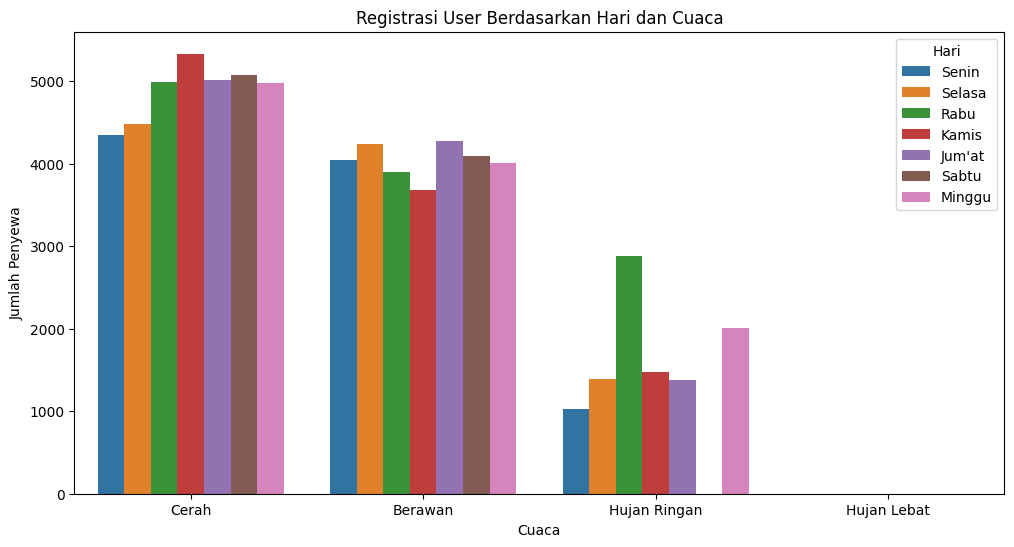

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mapping manual agar tidak ada kesalahan penulisan
cuaca_mapping = {
    1: "Cerah",
    2: "Berawan",
    3: "Hujan Ringan",
    4: "Hujan Lebat"
}

hari_mapping = {
    0: "Senin",
    1: "Selasa",
    2: "Rabu",
    3: "Kamis",
    4: "Jum'at",
    5: "Sabtu",
    6: "Minggu"
}


cuaca_order = ["Cerah", "Berawan", "Hujan Ringan", "Hujan Lebat"]
hari_order = ["Senin", "Selasa", "Rabu", "Kamis", "Jum'at", "Sabtu", "Minggu"]

plt.figure(figsize=(12, 6))
sns.barplot(x="weathersit", y="cnt", hue="weekday", data=df_day,
            order=cuaca_order, hue_order=hari_order, errorbar=None)

plt.title("Registrasi User Berdasarkan Hari dan Cuaca")
plt.xlabel("Cuaca")
plt.ylabel("Jumlah Penyewa")
plt.legend(title="Hari")
plt.show()


### Pertanyaan 2: Bagaimana perbandingan antara jumlah penyewaan sepeda pada musim semi, musim panas, musim gugur, dan musim dingin?



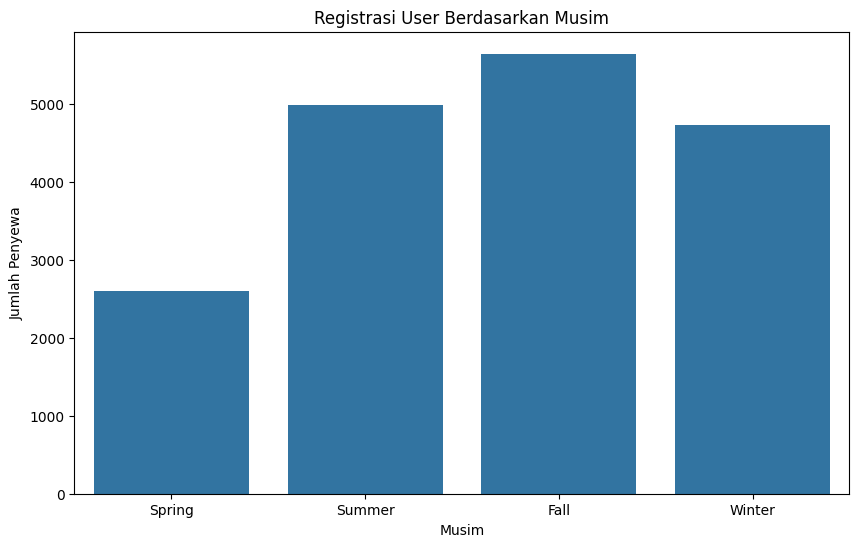

In [25]:
season_mapping = {
    1: "Spring",
    2: "Summer",
    3: "Fall",
    4: "Winter"
}

df_day["season"] = df_day["season"].map(season_mapping)

season_order = ["Spring", "Summer", "Fall", "Winter"]

plt.figure(figsize=(10, 6))
sns.barplot(x="season", y="cnt", data=df_day, order=season_order, errorbar=None)

plt.title("Registrasi User Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Penyewa")
plt.show()


### Pertanyaan 3 : Pada jam berapa penyewaan sepeda mencapai jumlah tertinggi dalam peminjamannya?



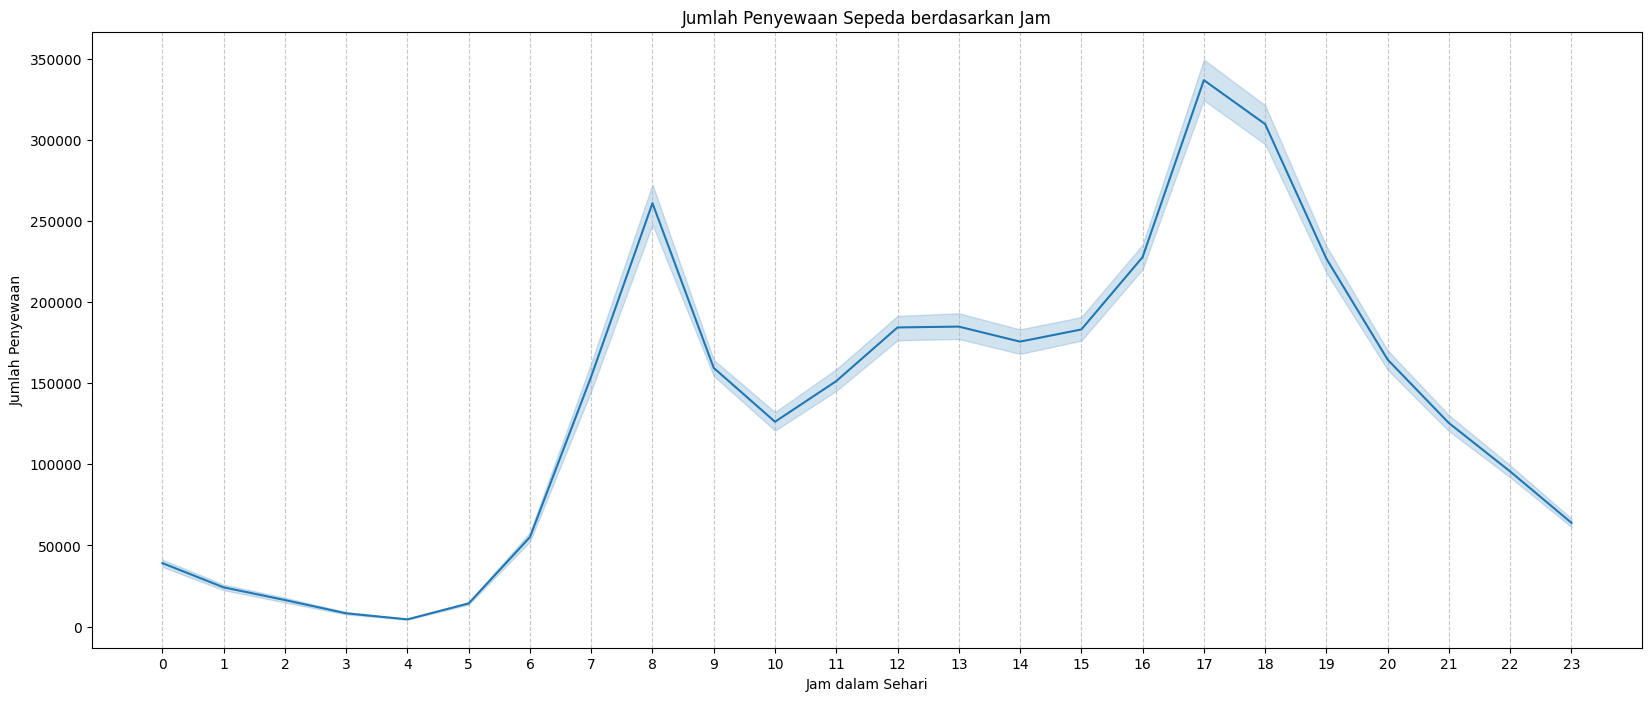

In [26]:
plt.figure(figsize=(20,8))
sns.lineplot(x="hr", y="cnt", data=df_hour, estimator="sum")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.title("Jumlah Penyewaan Sepeda berdasarkan Jam")
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Jumlah Penyewaan")
plt.xticks(range(24))
plt.show()


**Insight:**
- Dari visualisasi data diatas dapat diliihat beberapa hal yaitu orang lebih tertarik untuk menyewa sepeda di cuaca yang cukup cerah dibandingkan cuaca lainnya.
- Lalu orang juga kebih sering menggunakan jasa penyewaan sepeda pada saat weekend atau libur dibandingkan disaat hari kerja
- Setelah itu kita bisa lihat grafik diatas bahwa jam sibuk untuk penyewaan sepeda berada di pukul 17 sore dan juga pada 8 pagi

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1

Bisa kita simpulkan pada cuaca cerah memiliki jhumlah penyewa terbanyak dibandingkan beberapa kondisi cuaca lainnya. Dan dimasing-masing cuaca memiliki hari dengan jumlah penyewa terbanyak seperti disaat cerah hari kamis memiliki penyewa terbanyak, lalu di cuaca berawan pada hari kamis, dan pada saat hujan ringan ini memiliki penurunan pada penyewaan sepeda yang hari terbanyak itu rabu.

Hari kamis memiliki jumlah penyewa terbanyak dengan kondisi cuaca cerah. Dan cuaca sangat mempengaruhi jumlah penyewa sepeda yang dimana minat akanhal itu jauh menurun ketika cuaca kurang bersahabat
- Conclution pertanyaan 2

Bisa di simpulkan dengan meilihat visualisasi dari jumlah penyewa pada musim tertentu, yang memiliki jumlah terbanyak pada musim gugur atau fall, yang dimana bisa menambah jumlah sepeda untuk menunjang permintaan pada musim gugur berikutnya.

- Conclution Pertanyaan 3

Bisa kita lihat bahwa jam teramai penyewaan sepeda pada pukul 17 dan diikuti pada pukul 8 pagi. yang bisa kita simpulkan bahwa kemungkinan jumlahb penyewa sepeda meningkat ketika di jam-jam sibuk seperti jam 8 pagi dan jam 17 atau 5 sore

In [27]:
df_day.to_csv("dayCleaned.csv", index=False)  # Simpan tanpa index


In [28]:
df_hour.to_csv("hourCleaned.csv", index=False)  # Simpan tanpa index
